In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
!gdown 1e6D5ybGcuINoZHKnVYzMr6RBvTXFUqBY

Downloading...
From: https://drive.google.com/uc?id=1e6D5ybGcuINoZHKnVYzMr6RBvTXFUqBY
To: /content/water-treatment.data
100% 92.5k/92.5k [00:00<00:00, 58.2MB/s]


#Import Data

In [ ]:
columns = ['Day', 'Q-E', 'ZN-E', 'PH-E', 'DBO-E', 'DQO-E', 'SS-E', 'SSV-E', 'SED-E', 'COND-E', 'PH-P',
                'DBO-P', 'SS-P', 'SSV-P', 'SED-P', 'COND-P', 'PH-D', 'DBO-D', 'DQO-D', 'SS-D', 'SSV-D',
                'SED-D', 'COND-D', 'PH-S', 'DBO-S', 'DQO-S', 'SS-S', 'SSV-S', 'SED-S', 'COND-S', 'RD-DBO-P',
                'RD-SS-P', 'RD-SED-P', 'RD-DBO-S', 'RD-DQO-S', 'RD-DBO-G', 'RD-DQO-G', 'RD-SS-G', 'RD-SED-G']
data = pd.read_csv('water-treatment.data', names=columns)

In [ ]:
# cek head dari data
data.head()

,Day,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101,1.50,7.8,?,407,166,66.3,4.5,2110,...,2000,?,58.8,95.5,?,70.0,?,79.4,87.3,99.6
1,D-2/3/90,39024,3.00,7.7,?,443,214,69.2,6.5,2660,...,2590,?,60.7,94.8,?,80.8,?,79.5,92.1,100
2,D-4/3/90,32229,5.00,7.6,?,528,186,69.9,3.4,1666,...,1888,?,58.2,95.6,?,52.9,?,75.8,88.7,98.5
3,D-5/3/90,35023,3.50,7.9,205,588,192,65.6,4.5,2430,...,1840,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100
4,D-6/3/90,36924,1.50,8.0,242,496,176,64.8,4.0,2110,...,2120,?,62.7,95.6,?,71.0,92.1,78.2,87.5,99.5


#EDA & Preprocessing Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       527 non-null    object 
 1   Q-E       527 non-null    object 
 2   ZN-E      527 non-null    object 
 3   PH-E      527 non-null    float64
 4   DBO-E     527 non-null    object 
 5   DQO-E     527 non-null    object 
 6   SS-E      527 non-null    object 
 7   SSV-E     527 non-null    object 
 8   SED-E     527 non-null    object 
 9   COND-E    527 non-null    int64  
 10  PH-P      527 non-null    float64
 11  DBO-P     527 non-null    object 
 12  SS-P      527 non-null    int64  
 13  SSV-P     527 non-null    object 
 14  SED-P     527 non-null    object 
 15  COND-P    527 non-null    int64  
 16  PH-D      527 non-null    float64
 17  DBO-D     527 non-null    object 
 18  DQO-D     527 non-null    object 
 19  SS-D      527 non-null    object 
 20  SSV-D     527 non-null    object

In [ ]:
# mengubah ? menjadi null
data.replace('?', np.nan, inplace = True)

In [ ]:
# mengubah tipe data seluruh atribut menjadi float
data.loc[:, data.columns != 'Day'] = data.loc[:, data.columns != 'Day'].astype(float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       527 non-null    object 
 1   Q-E       509 non-null    float64
 2   ZN-E      524 non-null    float64
 3   PH-E      527 non-null    float64
 4   DBO-E     504 non-null    float64
 5   DQO-E     521 non-null    float64
 6   SS-E      526 non-null    float64
 7   SSV-E     516 non-null    float64
 8   SED-E     502 non-null    float64
 9   COND-E    527 non-null    float64
 10  PH-P      527 non-null    float64
 11  DBO-P     487 non-null    float64
 12  SS-P      527 non-null    float64
 13  SSV-P     516 non-null    float64
 14  SED-P     503 non-null    float64
 15  COND-P    527 non-null    float64
 16  PH-D      527 non-null    float64
 17  DBO-D     499 non-null    float64
 18  DQO-D     518 non-null    float64
 19  SS-D      525 non-null    float64
 20  SSV-D     514 non-null    float6

In [ ]:
# cek missing values
data.isna().sum()

Day          0
Q-E         18
ZN-E         3
PH-E         0
DBO-E       23
DQO-E        6
SS-E         1
SSV-E       11
SED-E       25
COND-E       0
PH-P         0
DBO-P       40
SS-P         0
SSV-P       11
SED-P       24
COND-P       0
PH-D         0
DBO-D       28
DQO-D        9
SS-D         2
SSV-D       13
SED-D       25
COND-D       0
PH-S         1
DBO-S       23
DQO-S       18
SS-S         5
SSV-S       17
SED-S       28
COND-S       1
RD-DBO-P    62
RD-SS-P      4
RD-SED-P    27
RD-DBO-S    40
RD-DQO-S    26
RD-DBO-G    36
RD-DQO-G    25
RD-SS-G      8
RD-SED-G    31
dtype: int64

In [ ]:
data.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,509.000000,524.000000,527.000000,504.000000,521.000000,526.000000,516.000000,502.000000,527.000000,527.000000,...,526.000000,465.000000,523.000000,500.000000,487.000000,501.000000,491.000000,502.000000,519.000000,496.000000
mean,37226.567780,2.359065,7.810057,188.714286,406.898273,227.444867,61.393217,4.593825,1478.620493,7.829981,...,1494.817490,39.085806,58.518738,90.554200,83.448049,67.817365,89.013646,77.856574,88.963391,99.086290
std,6635.999806,2.749509,0.246175,62.062831,120.362974,135.940589,12.415264,2.743947,394.898019,0.226925,...,387.906161,14.792976,12.802547,8.944776,8.804256,11.617612,7.027651,8.888932,8.221612,4.457165
min,10050.000000,0.100000,6.900000,31.000000,81.000000,98.000000,13.200000,0.400000,651.000000,7.300000,...,683.000000,0.600000,5.300000,7.700000,8.200000,1.400000,19.600000,19.200000,10.300000,36.400000
25%,32888.000000,0.900000,7.600000,146.750000,325.000000,170.000000,55.700000,3.100000,1201.000000,7.700000,...,1234.500000,29.300000,50.550000,88.600000,81.400000,63.100000,87.600000,74.000000,87.600000,99.300000
50%,35990.000000,1.500000,7.800000,182.500000,400.000000,196.000000,64.300000,4.500000,1406.000000,7.800000,...,1432.000000,39.600000,59.500000,93.300000,85.400000,69.900000,90.200000,79.150000,90.700000,99.700000
75%,41372.000000,3.000000,8.000000,223.000000,478.000000,242.000000,69.725000,5.500000,1672.000000,8.000000,...,1692.250000,49.200000,66.900000,96.000000,87.900000,75.300000,92.450000,83.400000,93.100000,100.000000
max,60081.000000,33.500000,8.700000,438.000000,941.000000,2008.000000,85.000000,36.000000,3230.000000,8.500000,...,3950.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


In [ ]:
# Isi missing value pada semua atribut menggunakan mean atribut tersebut
for col in data.columns[1:]:
  data[col].fillna(data[col].mean(), inplace=True)

In [ ]:
data.isna().sum()

Day         0
Q-E         0
ZN-E        0
PH-E        0
DBO-E       0
DQO-E       0
SS-E        0
SSV-E       0
SED-E       0
COND-E      0
PH-P        0
DBO-P       0
SS-P        0
SSV-P       0
SED-P       0
COND-P      0
PH-D        0
DBO-D       0
DQO-D       0
SS-D        0
SSV-D       0
SED-D       0
COND-D      0
PH-S        0
DBO-S       0
DQO-S       0
SS-S        0
SSV-S       0
SED-S       0
COND-S      0
RD-DBO-P    0
RD-SS-P     0
RD-SED-P    0
RD-DBO-S    0
RD-DQO-S    0
RD-DBO-G    0
RD-DQO-G    0
RD-SS-G     0
RD-SED-G    0
dtype: int64

In [ ]:
# drop kolom Day
data.drop(['Day'], axis=1, inplace=True)

In [ ]:
# menghapus outlier
def del_outliers(data):
    data = data[(np.abs(data-data.mean()) <= (3*data.std()))]
    return data
data = del_outliers(data)
data.describe()

,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,PH-P,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
count,519.000000,519.000000,525.000000,522.000000,522.000000,520.000000,519.000000,520.000000,523.000000,527.000000,...,522.000000,527.000000,524.000000,516.000000,521.000000,518.000000,520.000000,520.000000,519.000000,522.000000
mean,37149.880963,2.128569,7.810095,186.537219,402.565881,215.522009,62.033768,4.363357,1467.520076,7.829981,...,1480.342562,39.085806,58.789456,91.387720,84.099466,68.569018,89.615752,78.393874,89.692692,99.447845
std,5962.267290,1.851563,0.240294,56.690810,111.598994,76.628124,11.225034,1.596800,374.968516,0.226925,...,356.844564,13.893820,12.271028,6.273242,5.519793,9.786368,3.863614,7.296464,5.249226,1.005957
min,24978.000000,0.100000,7.200000,31.000000,81.000000,98.000000,25.500000,0.400000,651.000000,7.300000,...,683.000000,0.600000,21.200000,65.300000,58.500000,33.900000,70.800000,51.900000,66.200000,88.900000
25%,32987.000000,0.900000,7.600000,148.000000,325.250000,170.000000,56.350000,3.200000,1200.000000,7.700000,...,1234.000000,31.150000,50.700000,89.475000,82.000000,64.000000,88.000000,74.600000,87.800000,99.200000
50%,36182.000000,1.500000,7.800000,185.000000,400.000000,196.000000,64.300000,4.500000,1403.000000,7.800000,...,1430.500000,39.085806,59.400000,93.300000,85.000000,69.550000,89.900000,78.800000,90.700000,99.700000
75%,40928.000000,2.910000,8.000000,220.750000,472.750000,242.000000,69.700000,5.500000,1667.500000,8.000000,...,1682.750000,47.650000,66.900000,95.700000,87.800000,75.075000,92.300000,83.300000,93.100000,100.000000
max,55930.000000,10.000000,8.500000,365.000000,747.000000,616.000000,85.000000,11.000000,2660.000000,8.500000,...,2610.000000,79.100000,96.100000,100.000000,94.700000,96.800000,97.000000,98.100000,99.400000,100.000000


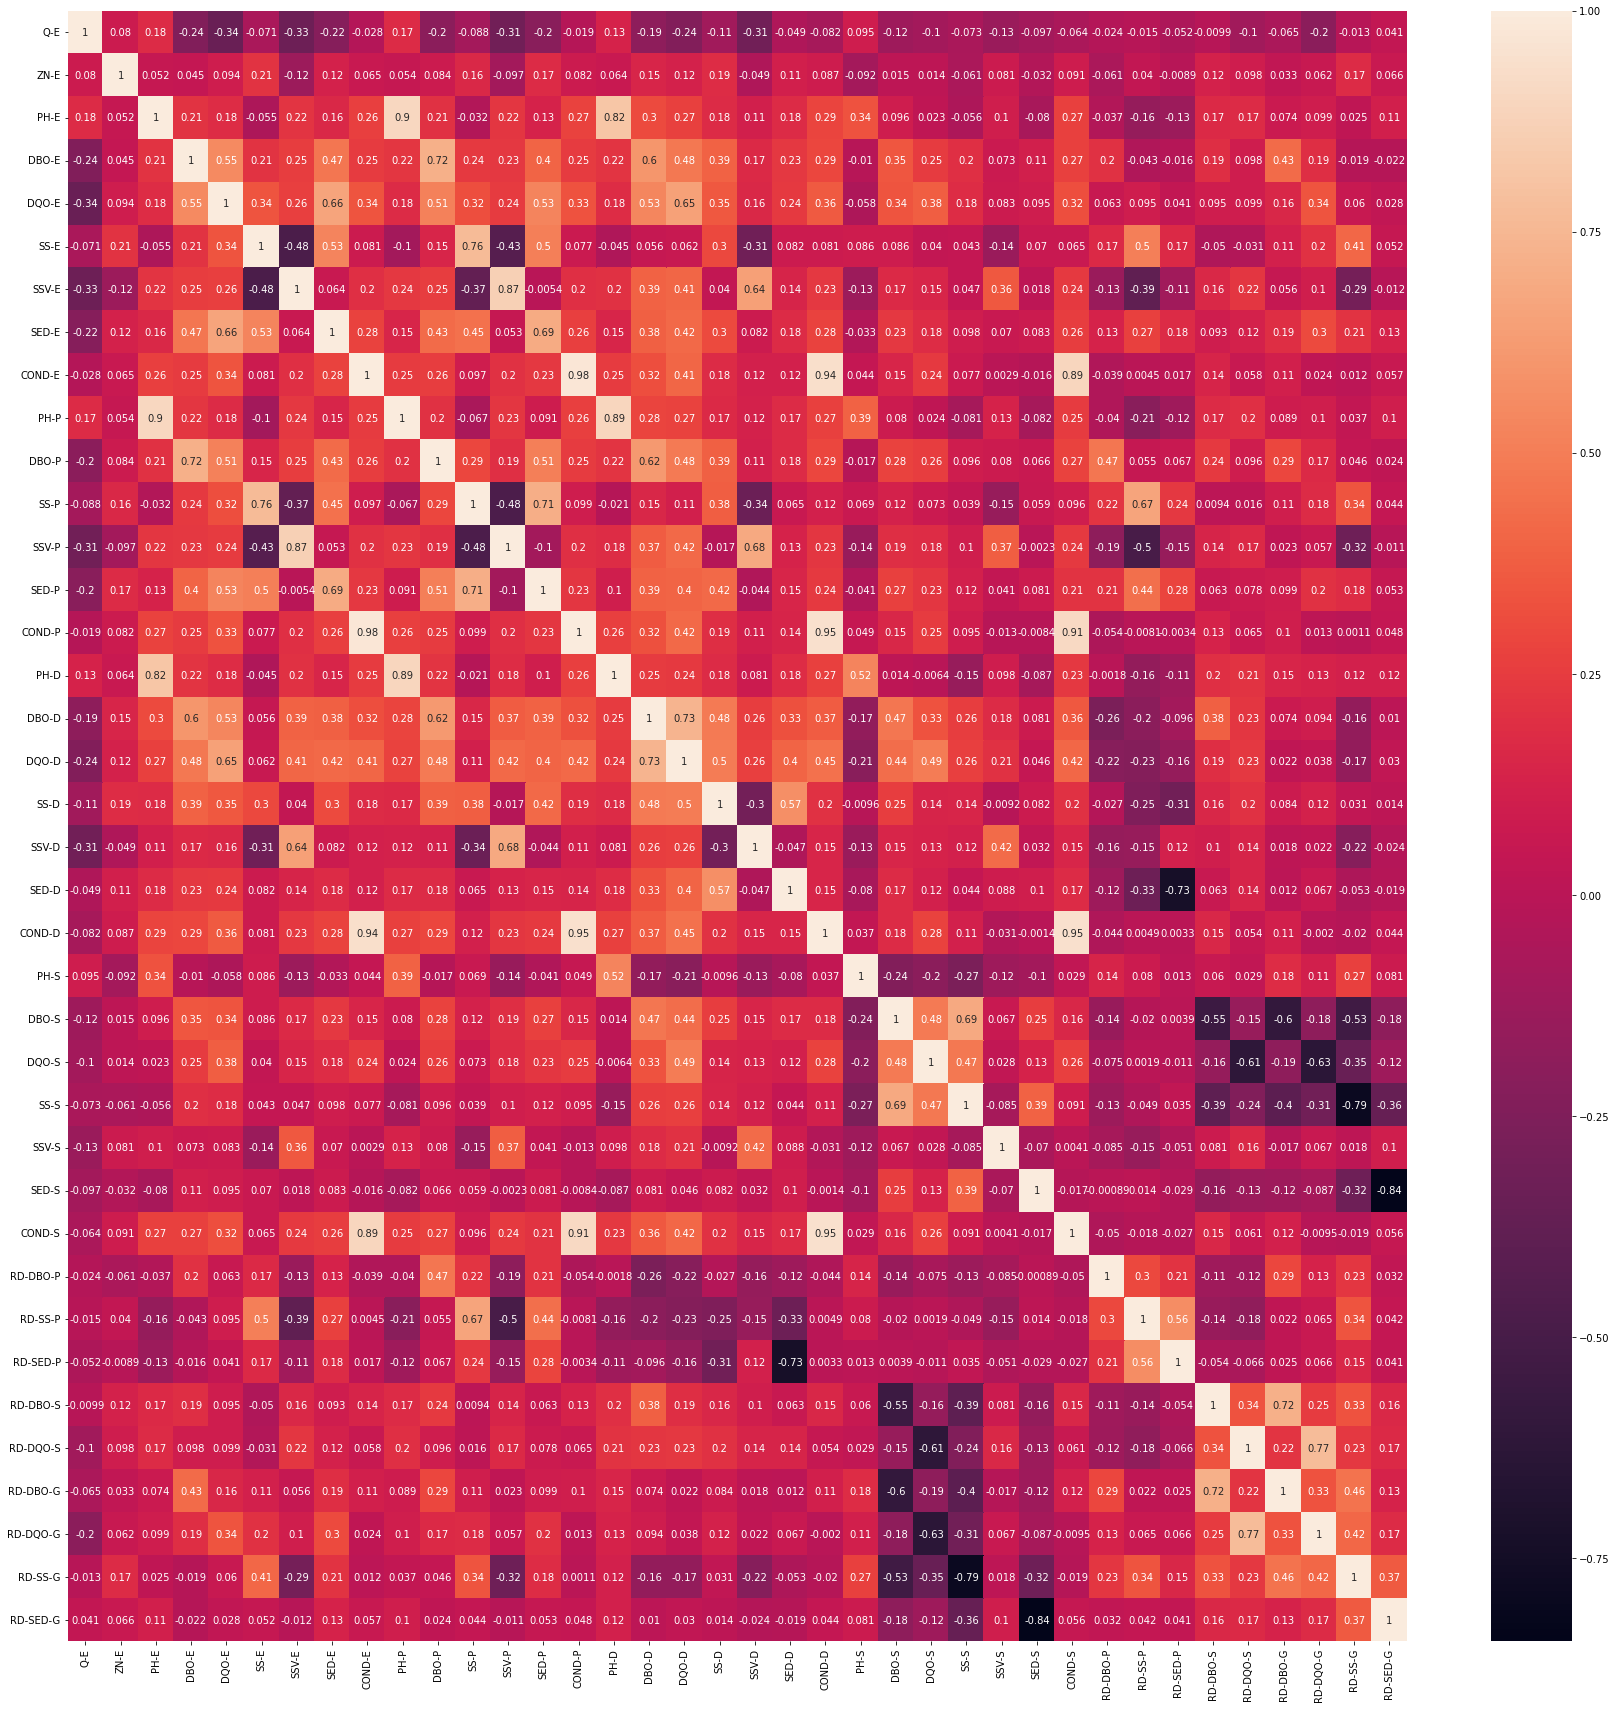

In [ ]:
# Menampilkan heatmap korelasi antar fitur
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
def high_correlation(data, threshold):
    corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold and i != j:
                colname = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                corr.add(colname)
                corr.add(colname2)
    return corr
print(high_correlation(data, 0.9))
data = data.filter(high_correlation(data,0.9))

{'PH-E', 'COND-S', 'COND-P', 'COND-E', 'COND-D', 'PH-P'}


In [ ]:
data.head()

,PH-E,COND-S,COND-P,COND-E,COND-D,PH-P
0,7.8,2000.0,2120.0,2110.0,2010.0,7.9
1,7.7,2590.0,2570.0,2660.0,NaN,7.7
2,7.6,1888.0,1594.0,1666.0,1742.0,7.7
3,7.9,1840.0,2280.0,2430.0,2060.0,7.8
4,8.0,2120.0,2020.0,2110.0,2250.0,7.9


In [ ]:
# Min-Max Scaling
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [ ]:
data.isna().sum()

PH-E      2
COND-S    5
COND-P    5
COND-E    4
COND-D    6
PH-P      0
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

PH-E      0
COND-S    0
COND-P    0
COND-E    0
COND-D    0
PH-P      0
dtype: int64

#Penerapan Algoritma KMeans

In [ ]:
def generate_rand_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [ ]:
def get_labels(data, centroids):
    dist = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return dist.idxmin(axis=1)

In [ ]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [ ]:
from sklearn.decomposition import PCA
from IPython.display import clear_output

def plot_clusters(data, labels, centroids, iter):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    plt.title(f'Iterasi ke-{iter}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], color='red')
    plt.show()

In [ ]:
def k_means(k, max_iter):
  centroids = generate_rand_centroids(data, k)
  centroids_lama = pd.DataFrame()
  iter = 1
  while iter < max_iter and not centroids.equals(centroids_lama):
      centroids_lama = centroids
      labels = get_labels(data, centroids)
      centroids = new_centroids(data, labels, k)
      plot_clusters(data, labels, centroids, iter)
      iter += 1
  return centroids, labels

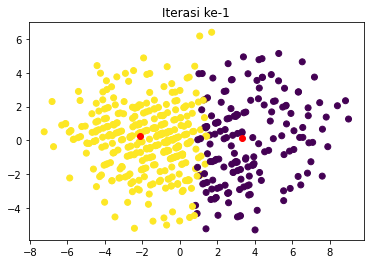

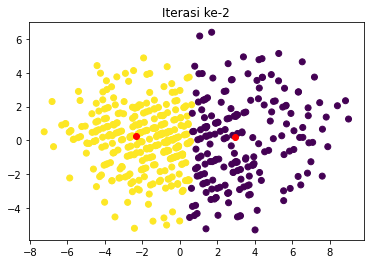

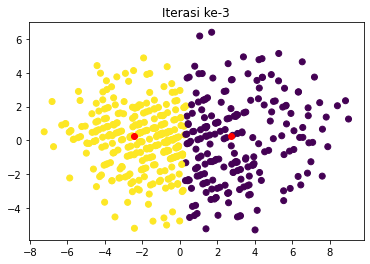

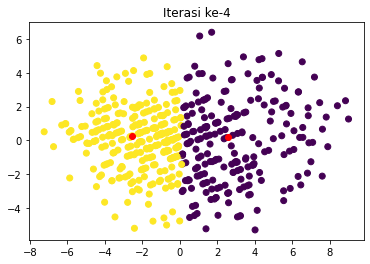

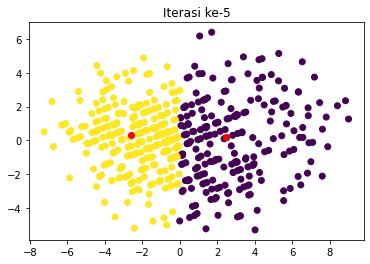

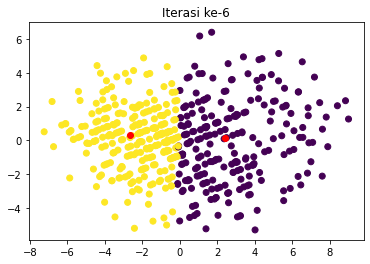

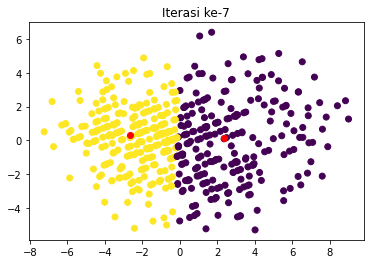

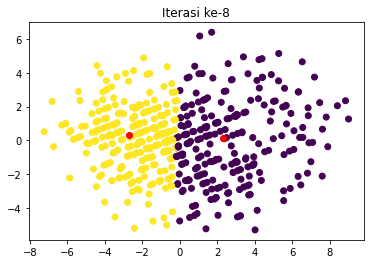

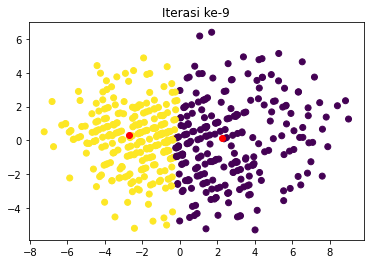

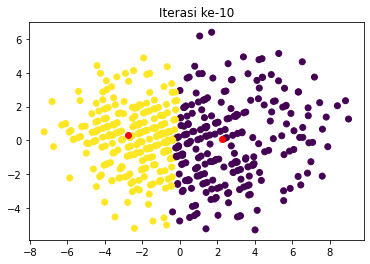

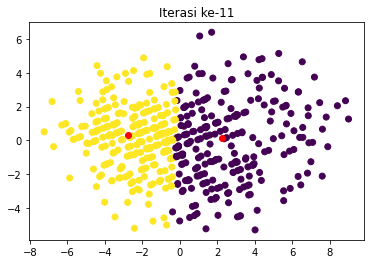

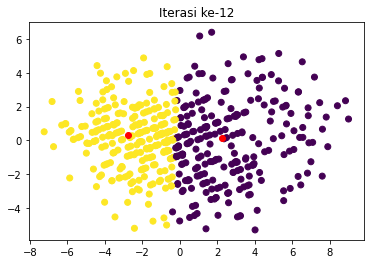

In [ ]:
centroids, labels = k_means(2, 100)

In [ ]:
centroids

,0,1
PH-E,5.750830,4.250008
COND-S,5.724127,3.460492
COND-P,5.778922,3.384762
COND-E,5.727756,3.345052
COND-D,6.405473,4.425445
PH-P,5.501232,3.997260


In [ ]:
labels.value_counts()

1    266
0    248
dtype: int64

#Evaluasi

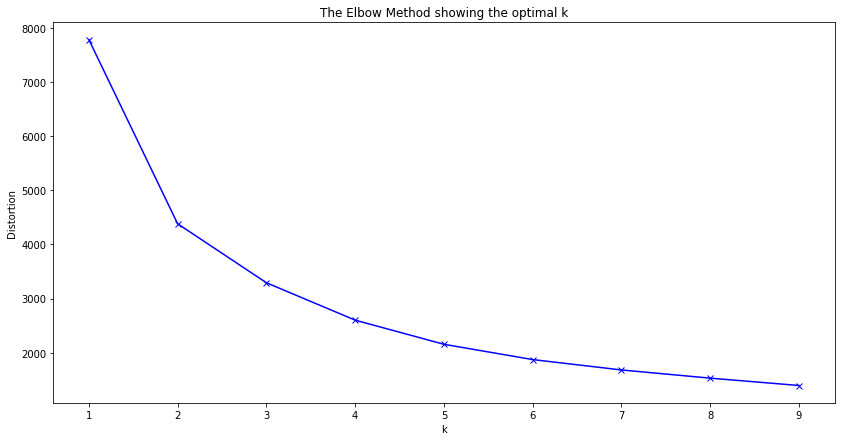

In [ ]:
from sklearn.cluster import KMeans
distortions = []
list_k = range(1,10)
for k in list_k:
    model = KMeans(n_clusters=k)
    model.fit(data)
    distortions.append(model.inertia_)

# Plot elbow
plt.figure(figsize=(14,7))
plt.plot(list_k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

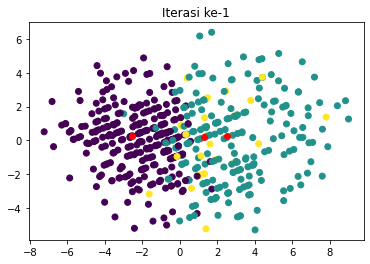

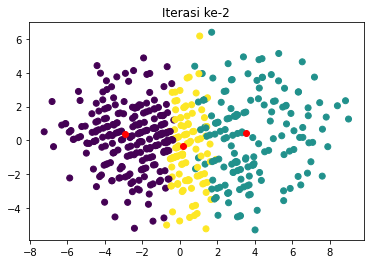

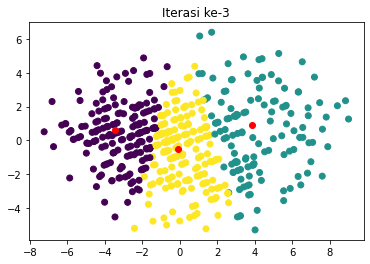

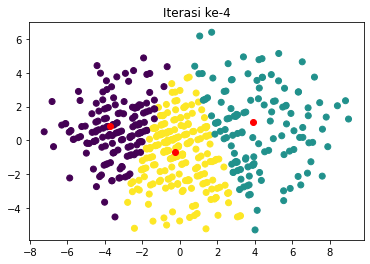

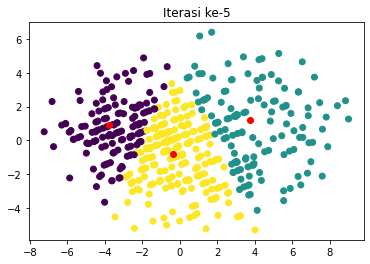

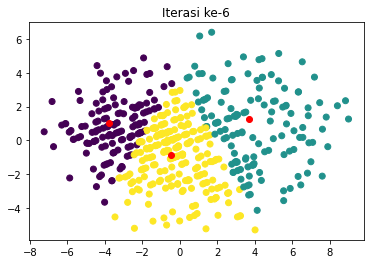

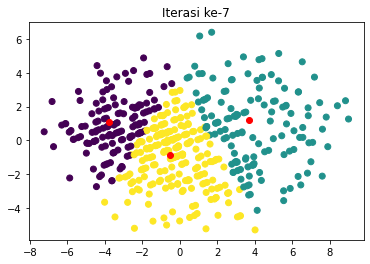

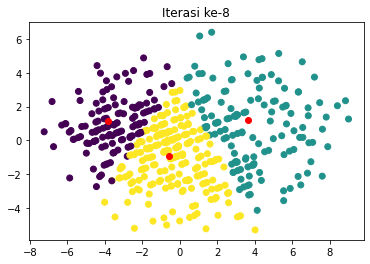

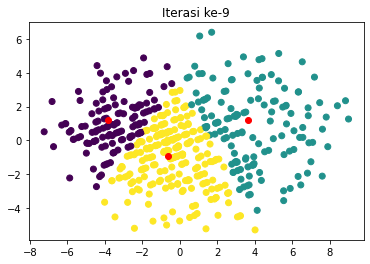

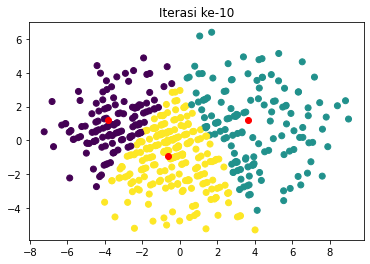

In [ ]:
centroids, labels = k_means(3, 100)

In [ ]:
centroids

,0,1,2
PH-E,3.385410,5.414744,5.666589
COND-S,3.116021,6.584821,4.206371
COND-P,3.018188,6.678335,4.182368
COND-E,3.000080,6.626646,4.123261
COND-D,4.148496,7.123853,5.064577
PH-P,3.168189,5.174923,5.386447


In [ ]:
labels.value_counts()

2    244
1    141
0    129
dtype: int64